<a href="https://colab.research.google.com/github/pratikmehkarkar/TfLiteModelTester/blob/main/TfliteTester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'data',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 300, 300,   3], dtype=int32),
  'shape_signature': array([  1, 300, 300,   3], dtype=int32),
  'sparsity_parameters': {}}]

In [ ]:
output_details = interpreter.get_output_details()
output_details

[{'dtype': numpy.float32,
  'index': 557,
  'name': 'model_output',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([1, 4], dtype=int32),
  'shape_signature': array([1, 4], dtype=int32),
  'sparsity_parameters': {}}]

In [ ]:
from PIL import Image

# im = Image.open("animal.jpg")
im = Image.open("1357.jpeg")
# im = Image.open("banana.jpg")

In [ ]:
print(im.size)

(640, 480)


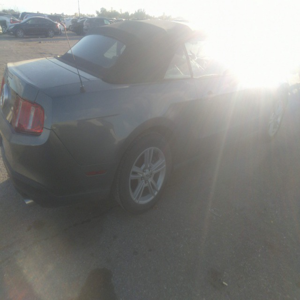

In [ ]:
res_im = im.resize((300, 300))
res_im

In [ ]:
np_res_im = np.array(res_im)
np_res_im = (np_res_im).astype('float32')
np_res_im

array([[[252., 252., 250.],
        [252., 253., 250.],
        [250., 252., 249.],
        ...,
        [252., 252., 250.],
        [252., 252., 250.],
        [252., 252., 250.]],

       [[253., 253., 251.],
        [251., 252., 250.],
        [251., 253., 250.],
        ...,
        [252., 252., 250.],
        [252., 252., 250.],
        [252., 252., 250.]],

       [[251., 251., 249.],
        [251., 252., 249.],
        [251., 253., 250.],
        ...,
        [252., 252., 250.],
        [252., 252., 250.],
        [252., 252., 250.]],

       ...,

       [[111., 108., 102.],
        [109., 107.,  99.],
        [108., 105.,  97.],
        ...,
        [101., 101.,  93.],
        [101., 100.,  95.],
        [ 99., 100.,  95.]],

       [[110., 106.,  99.],
        [109., 105.,  97.],
        [109., 106.,  97.],
        ...,
        [ 99.,  98.,  92.],
        [100., 100.,  95.],
        [ 99., 100.,  96.]],

       [[110., 105.,  99.],
        [110., 106.,  97.],
        [110., 1

In [ ]:
input_details[0]['shape']

array([  1, 300, 300,   3], dtype=int32)

In [ ]:
np_res_im.shape

(300, 300, 3)

In [ ]:
if len(np_res_im.shape) == 3:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
output_data.shape

(1, 4)

In [ ]:
output_data[0].shape

(4,)

In [ ]:
classification_prob = []
classification_label = []
total = 0
for index,prob in enumerate(output_data[0]):
    if prob != 0:
        classification_prob.append(prob)
        total += prob
        classification_label.append(index)

In [ ]:
label_names = [line.rstrip('\n') for line in open("mylabel.txt")]
label_names

['BLUR', 'GLARE', 'OOF', 'SHADOW']

In [ ]:
found_labels = np.array(label_names)[classification_label]

In [ ]:
import pandas as pd

df = pd.DataFrame(classification_prob/total, found_labels)
sorted_df = df.sort_values(by=0,ascending=False)
sorted_df

,0
BLUR,0.859783
GLARE,0.099234
SHADOW,0.031537
OOF,0.009447
